
# 1D Poisson Equation using Finite Element Method (FEM)

In this notebook, we solve the 1D Poisson equation using the Finite Element Method from scratch using only NumPy and SciPy.

We solve:

$$
-\frac{d^2u}{dx^2} = f(x), \quad x \in (0, 1)
$$

with Dirichlet boundary conditions: \( u(0) = u(1) = 0 \) and source term $f(x) = \pi^2 \sin(\pi x)$. This case, specifically, has the analytical solution $u(x) = \sin(\pi x)$


In [9]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve



## 🔧 Step 1: Define Source Term and Parameters


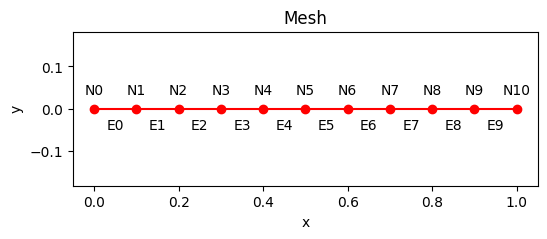

In [10]:

# Domain
L = 1.0

# Number of elements and nodes
n_elements = 10
n_nodes = n_elements + 1

# Mesh size
h = L / n_elements

# Node coordinates
x = np.linspace(0, L, n_nodes)

# Source function f(x)
def f(x):
    return np.pi**2 * np.sin(np.pi * x)  # exact solution u(x) = sin(pi * x)

# Plot the mesh
plt.figure()
plt.plot(x, np.zeros_like(x), 'ro-')
plt.title('Mesh')
plt.xlabel('x')
plt.ylabel('y')
# Annotate nodes and elements
for i in range(n_nodes):
    plt.annotate(f'N{i}', (x[i], 0), textcoords="offset points", xytext=(0,10), ha='center')
for i in range(n_elements):
    plt.annotate(f'E{i}', ((x[i] + x[i+1]) / 2, 0), textcoords="offset points", xytext=(0,-15), ha='center')

# Make the figure smaller vertically, the plot is a horizontal line
plt.gcf().set_size_inches(6, 2)



plt.axis('equal')
plt.savefig('images/mesh.png', dpi=300)




## 🧱 Step 2: Assemble the Stiffness Matrix and Load Vector
We use piecewise linear basis functions (hat functions).


In [11]:

A = lil_matrix((n_nodes, n_nodes))
b = np.zeros(n_nodes)

# Assembly loop
for i in range(n_elements):
    x0, x1 = x[i], x[i+1]
    h_e = x1 - x0
    
    # Element stiffness matrix (constant for uniform mesh)
    A_e = np.array([[1, -1], [-1, 1]]) / h_e
    
    # Midpoint rule for load vector
    x_mid = 0.5 * (x0 + x1)
    f_mid = f(x_mid)
    b_e = f_mid * h_e * np.array([0.5, 0.5])
    
    # Assemble global system
    A[i:i+2, i:i+2] += A_e
    b[i:i+2] += b_e



## 🚧 Step 3: Apply Dirichlet Boundary Conditions
We apply \( u(0) = 0 \) and \( u(1) = 0 \).


In [12]:

# Modify system for Dirichlet BCs
A = A.tocsr()
A[0, :] = 0; A[0, 0] = 1; b[0] = 0
A[-1, :] = 0; A[-1, -1] = 1; b[-1] = 0


/home/gfbarros/miniconda3/envs/neural_operator_pipeline/lib/python3.10/site-packages/scipy/sparse/_index.py:197: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)



## ✅ Step 4: Solve the Linear System


In [13]:

u = spsolve(A, b)



## 📈 Step 5: Plot the Numerical and Exact Solution


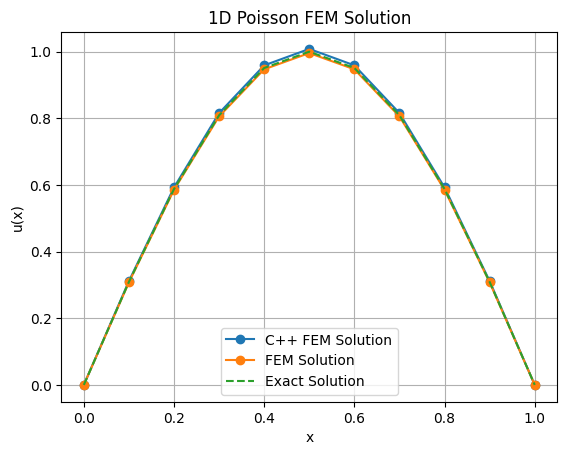

In [16]:
import os
import pandas as pd
solution_file = 'solution.csv'


if os.path.exists(solution_file):
    # Read the existing solution
    existing_solution = pd.read_csv(solution_file)
    x_cpp, u_cpp = existing_solution['x'].values, existing_solution['approx'].values

    plt.plot(x_cpp, u_cpp, 'o-', label='C++ FEM Solution')

# Exact solution for comparison
u_exact = np.sin(np.pi * x)

plt.plot(x, u, 'o-', label='Python FEM Solution')
plt.plot(x, u_exact, '--', label='Exact Solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('1D Poisson FEM Solution')
plt.grid(True)
plt.savefig('images/solution.png', dpi=300)
plt.show()


In [15]:
# Check if solution.csv exists in the current directory
# If it does, read it and plot the existing solution


    
